# Problem Set 6: Estimating Causal Effects

## 7 pts per question, 91 points in total out of 90 points

### Summary and Motivation
This problem set aims to equip students with the skills needed to estimate and interpret causal relationships using statistical techniques. The problem set focuses on analyzing the impact of interventions, such as training programs and education policies, through methods like randomized controlled trials and difference-in-differences estimators.

By engaging with these exercises, students will enhance their understanding of causal inference, learn to apply Python for data analysis, and develop the ability to draw meaningful conclusions from empirical data. This hands-on experience is crucial for conducting rigorous economic and business research.

### Instruction

Please follow below questions and instructions to complete this problem set. In some questions, please write and execute Python code for data analysis in Cell mode. Comment your code to explain each step. Some questions need text discussion. Please Provide a detailed discussion of your results, including interpretations and answers to questions in Raw mode.

Once you have completed the assignment, save your Jupyter notebook with the following naming convention: ECN310_ProblemSetX_LastName_FirstName.ipynb (replace X with the assignment number).



## Exercise 1: Estimating Causal Effects using Randomization

**Introduction**

In this problem set, you will estimate the causal effect of a training program on participants’ earnings. The dataset you will use is from a randomized controlled trial where participants were randomly assigned to either a treatment group (who received the training) or a control group (who did not receive the training). Randomization helps ensure that any differences in outcomes between the groups can be attributed to the training program.

**Dataset Description**

The dataset `training_program.csv` includes the following variables:

- `id`: Unique identifier for each participant
- `treatment`: Binary variable indicating treatment assignment (1 = treated, 0 = control)
- `pre_earnings`: Earnings before the training program (in dollars)
- `post_earnings`: Earnings after the training program (in dollars)

**Objective**

Your objective is to estimate the causal effect of the training program on participants’ post-training earnings.

### 1. Data Exploration

- Load the dataset into Python and display the first few rows.

In [1]:
# Please write your executable code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("training_program.csv", index_col=0)
df

,treatment,pre_earnings,post_earnings
id,,,
1,0,47794.61771,46260.52957
2,1,42669.67004,41214.43663
3,1,46571.21138,61175.58348
4,1,40048.51518,47712.55661
5,0,73079.16251,65406.00875
...,...,...,...
2996,1,54720.02271,55589.44020
2997,0,62024.51248,55689.92879
2998,0,89262.37706,91723.96269


- Provide summary statistics for the variables `pre_earnings` and `post_earnings` for both treatment and control groups.

In [2]:
# Please write your executable code here
treatment_df = df[df['treatment'] == 1]
control_df = df[df['treatment'] == 0]

In [3]:
print(treatment_df.describe())
print(control_df.describe())

       treatment  pre_earnings  post_earnings
count     1515.0   1515.000000    1515.000000
mean         1.0  49954.768143   54890.146825
std          0.0  10270.143913   11440.655848
min          1.0  18295.742640   18599.235880
25%          1.0  42814.858290   46757.529740
50%          1.0  50078.801850   55169.527670
75%          1.0  56956.331570   62797.068740
max          1.0  82430.929700   91574.126590
       treatment  pre_earnings  post_earnings
count     1485.0   1485.000000    1485.000000
mean         0.0  49643.954627   49663.405851
std          0.0   9727.297819   10952.873242
min          0.0  18232.961870    9992.943974
25%          0.0  43094.589480   42833.018700
50%          0.0  49641.744210   49350.187610
75%          0.0  55904.220610   57016.673040
max          0.0  89262.377060   91723.962690


### 2. Randomization Check

- Verify that the randomization was successful by comparing the `pre_earnings` between the treatment and control groups. Use a t-test to check for any statistically significant differences.

In [16]:
# Please write your executable code here
t_stat, p_value = stats.ttest_ind(treatment_df['pre_earnings'], control_df['pre_earnings'], equal_var=True)
print(p_value)
print("There is no no statistically significant difference because p-value is much larger than most values of alpha.")

0.3949929406481365
There is no no statistically significant difference because p-value is much larger than most values of alpha.


### 3. Estimating the Causal Effect

- Estimate the effect of the training program on `post_earnings` using the difference in means between the treatment and control groups.

In [17]:
# Please write your executable code here
diff = treatment_df['post_earnings'].mean() - control_df['post_earnings'].mean()
print(diff)

5226.740973481668


- Conduct a regression analysis where `post_earnings` is the dependent variable and `treatment` is the independent variable. Interpret the coefficient on the treatment variable.

In [6]:
# Please write your executable code here

results = smf.ols("post_earnings ~ C(treatment)", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          post_earnings   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.92e-36
Time:                        22:24:20   Log-Likelihood:                -32227.
No. Observations:                3000   AIC:                         6.446e+04
Df Residuals:                    2998   BIC:                         6.447e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.966e+04    290.68

In [7]:
results2 = smf.ols("post_earnings ~ C(treatment) + pre_earnings", data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          post_earnings   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     6256.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:24:20   Log-Likelihood:                -29841.
No. Observations:                3000   AIC:                         5.969e+04
Df Residuals:                    2997   BIC:                         5.971e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            66.2665    476.71

### 4. Conclusion

- Summarize your findings. Discuss whether the training program had a statistically significant effect on post-training earnings and whether controlling for pre-training earnings influenced your results.

## Exercise 2: Implementing The Difference-in-Differences Estimator

#### Background
You are an economist studying the impact of a new education policy implemented in a specific region on student performance. The policy was introduced in 2022, aiming to improve the quality of education in public schools. You have data from 2019 to 2023 for both the treated region (where the policy was implemented) and a control region (where the policy was not implemented).

#### Data Description
You are provided with a dataset (`student_performance_dataDID.csv`) containing the following variables:
- `year`: The year of the observation (2019-2023).
- `region`: The region identifier (treated or control).
- `student_performance`: Average performance score of students in the school.

#### Tasks

### 1: Load the Data
- Read the dataset into a pandas DataFrame.

In [8]:
# Please write your executable code here

df = pd.read_csv("student_performance_data_DID.csv")
df

,year,region,students_performance
0,2019,control,73.652969
1,2019,control,72.430664
2,2019,control,67.759575
3,2019,control,74.221611
4,2019,control,78.163910
...,...,...,...
2995,2023,treated,70.771416
2996,2023,treated,73.878273
2997,2023,treated,82.847946
2998,2023,treated,77.429466


### 2: Descriptive Statistics
- Calculate and interpret descriptive statistics for student performance in both regions before and after the policy implementation.

In [9]:
# Please write your executable code here

before = df[df['year'] < 2022]
after = df[df['year'] >= 2022]

# Groupby and describe source - https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
print("Before")
print(before.groupby('region')['students_performance'].describe())
print("====================")
print("After")
print(after.groupby('region')['students_performance'].describe())

Before
         count       mean       std        min        25%        50%  \
region                                                                 
control  900.0  75.279510  4.929699  60.518723  72.003105  75.238709   
treated  900.0  75.280607  4.964220  58.793663  71.882202  75.284157   

               75%        max  
region                         
control  78.542590  91.205536  
treated  78.400365  94.263657  
After
         count       mean       std        min        25%        50%  \
region                                                                 
control  600.0  75.014179  4.968003  60.044319  71.837136  74.843754   
treated  600.0  77.065666  4.869755  61.902439  73.764141  77.024494   

               75%        max  
region                         
control  78.271593  94.631187  
treated  80.307597  92.688744  


### 3: Parallel Trends Check
- Create a plot showing the average student performance over time for both regions to visually inspect the parallel trends assumption.

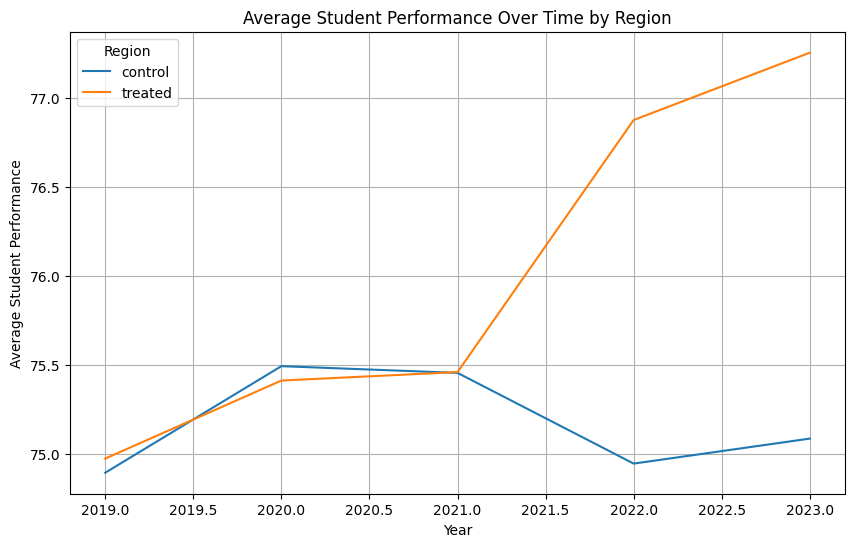

In [19]:
# Please write your executable code here

import matplotlib.pyplot as plt

# Index needs to be reset as getting data from data gives them indices that are not ordered 1 through n
# Source - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
avg_perf = df.groupby(['year', 'region'])['students_performance'].mean().reset_index()

plt.figure(figsize=(10, 6))
for region in avg_perf['region'].unique():
    region_data = avg_perf[avg_perf['region'] == region]
    plt.plot(region_data['year'], region_data['students_performance'], label=region)

plt.xlabel('Year')
plt.ylabel('Average Student Performance')
plt.legend(title='Region')
plt.grid(True)

plt.show()

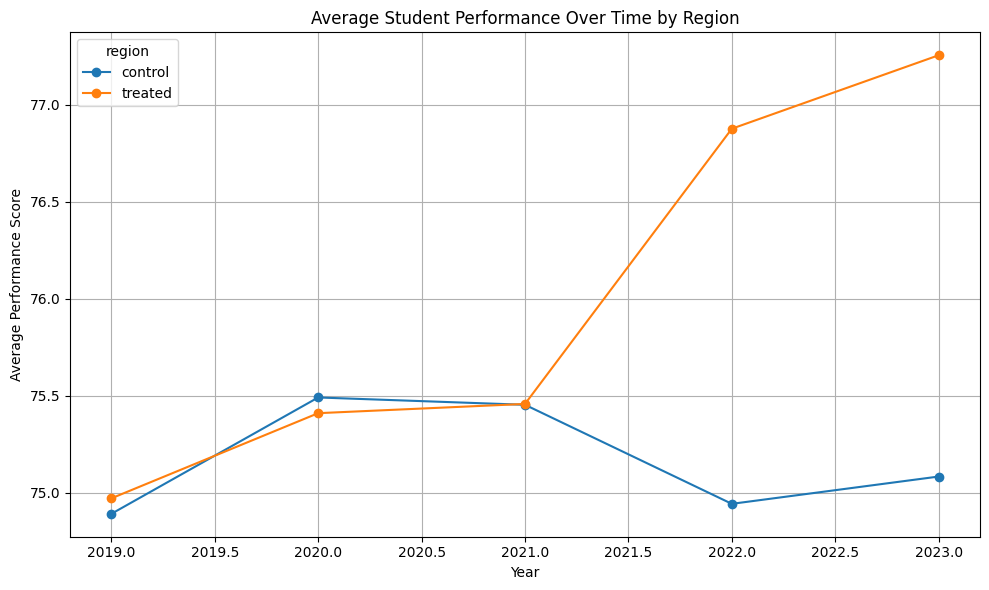

In [25]:
data = df

# Using unstack to pivot the grouped data so that each region becomes a separate column
# Source - https://towardsdatascience.com/reshaping-a-dataframe-with-pandas-stack-and-unstack-925dc9ce1289
avg_perf = data.groupby(['year', 'region'])['students_performance'].mean().unstack()

# Plot the data
avg_perf.plot(marker='o', figsize=(10, 6))

# Add labels and title
plt.title('Average Student Performance Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Performance Score')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### 4: Difference-in-Differences Estimation
- Create a dummy variable for the post-treatment period (`post`), which is 1 for years 2022 and 2023, and 0 otherwise.

In [26]:
# Please write your executable code here

df['post'] = (df['year'] >= 2022).astype(int)
df

,year,region,students_performance,post,treated,post_treatment
0,2019,control,73.652969,0,0,0
1,2019,control,72.430664,0,0,0
2,2019,control,67.759575,0,0,0
3,2019,control,74.221611,0,0,0
4,2019,control,78.163910,0,0,0
...,...,...,...,...,...,...
2995,2023,treated,70.771416,1,1,1
2996,2023,treated,73.878273,1,1,1
2997,2023,treated,82.847946,1,1,1
2998,2023,treated,77.429466,1,1,1


- Create a dummy variable for the treated region (`treated`), which is 1 for the treated region and 0 for the control region.

In [27]:
# Please write your executable code here

df['treated'] = (df['region'] == 'treated').astype(int)
df

,year,region,students_performance,post,treated,post_treatment
0,2019,control,73.652969,0,0,0
1,2019,control,72.430664,0,0,0
2,2019,control,67.759575,0,0,0
3,2019,control,74.221611,0,0,0
4,2019,control,78.163910,0,0,0
...,...,...,...,...,...,...
2995,2023,treated,70.771416,1,1,1
2996,2023,treated,73.878273,1,1,1
2997,2023,treated,82.847946,1,1,1
2998,2023,treated,77.429466,1,1,1


- Compute the difference-in-differences estimator using the following regression model:

$$y_{it} = \alpha + \beta_1 \text{treated}_i + \beta_2 \text{post}_t + \beta_3 (\text{treated}_i \times \text{post}_t) + \epsilon_{it}$$

where $y_{it}$ is the student performance in region $i$ in year $t$.

In [28]:
# Please write your executable code here

df['post_treatment'] = df['treated'] * df['post']
results3 = smf.ols("students_performance ~ treated + post + post_treatment", data=df).fit()
print(results3.summary())

                             OLS Regression Results                             
Dep. Variable:     students_performance   R-squared:                       0.022
Model:                              OLS   Adj. R-squared:                  0.021
Method:                   Least Squares   F-statistic:                     22.96
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):           1.08e-14
Time:                          23:23:07   Log-Likelihood:                -9044.4
No. Observations:                  3000   AIC:                         1.810e+04
Df Residuals:                      2996   BIC:                         1.812e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         75.279

### 5: Interpretation
- Interpret the coefficients from your regression model, particularly focusing on the coefficient for the interaction term ($\beta_3$).